<a href="https://colab.research.google.com/github/Diksha-Bora/Data-Science-project/blob/main/SVM9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SUPPORT VECTOR MACHINE 


In [65]:
# IMPORTING REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [66]:
# IMPORTING DATASET
from sklearn import datasets 
iris = datasets.load_iris()

In [67]:
data =pd.DataFrame(iris.data,columns = iris.feature_names)
data["Target"]=iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [68]:
data.columns = data.columns.str.capitalize()
data.head()

,Sepal length (cm),Sepal width (cm),Petal length (cm),Petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [69]:
data.isnull().sum()

Sepal length (cm)    0
Sepal width (cm)     0
Petal length (cm)    0
Petal width (cm)     0
Target               0
dtype: int64

In [70]:
data["Target"].value_counts()

0    50
1    50
2    50
Name: Target, dtype: int64

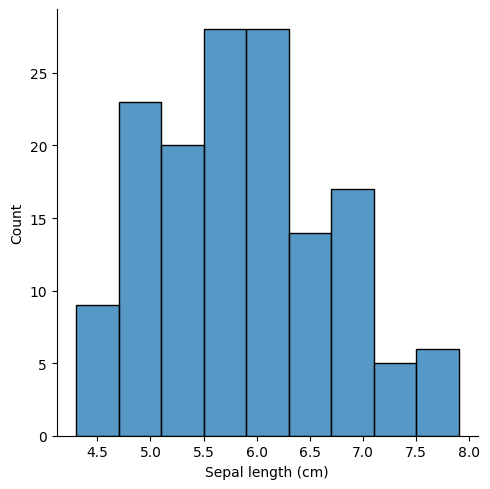

In [71]:
# DATA VISUALIZATION
sns.displot(data,x="Sepal length (cm)")

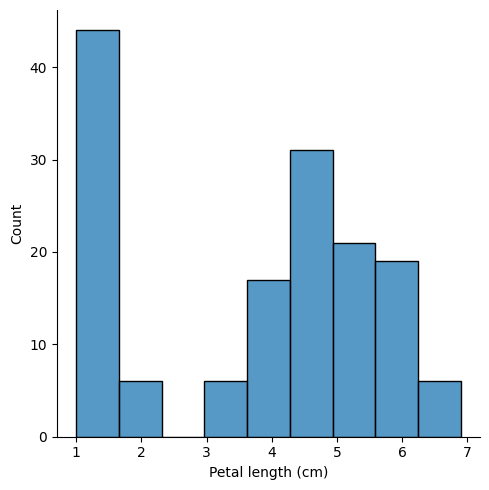

In [72]:
sns.displot(data,x="Petal length (cm)")

<Axes: >

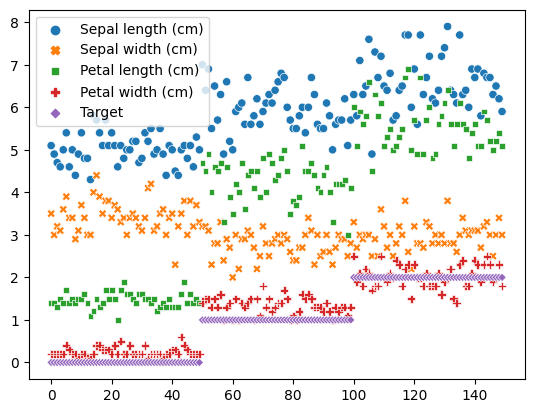

In [73]:
sns.scatterplot(data)

<Axes: xlabel='Sepal length (cm)', ylabel='Sepal width (cm)'>

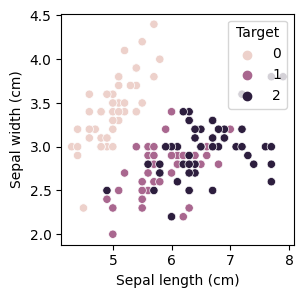

In [74]:
plt.figure(figsize=[3,3])
sns.scatterplot(data,x="Sepal length (cm)",y="Sepal width (cm)",hue="Target")

<Axes: xlabel='Petal length (cm)', ylabel='Petal width (cm)'>

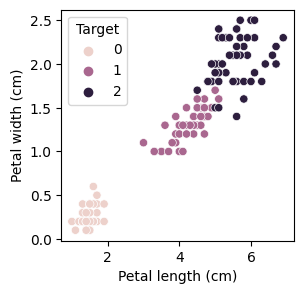

In [75]:
plt.figure(figsize=[3,3])
sns.scatterplot(data,x="Petal length (cm)",y="Petal width (cm)",hue="Target")

<Axes: xlabel='Sepal width (cm)', ylabel='Petal width (cm)'>

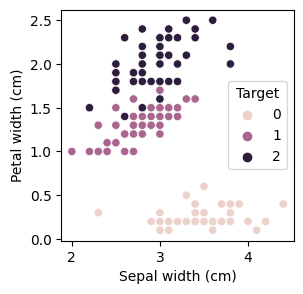

In [76]:
plt.figure(figsize=[3,3])
sns.scatterplot(data,x="Sepal width (cm)",y="Petal width (cm)",hue="Target")

<Axes: xlabel='Sepal length (cm)', ylabel='Petal length (cm)'>

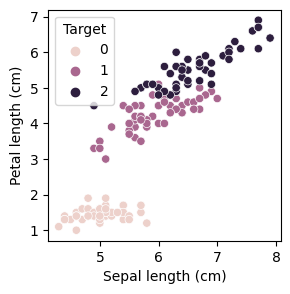

In [77]:
plt.figure(figsize=[3,3])
sns.scatterplot(data,x="Sepal length (cm)",y="Petal length (cm)",hue="Target")

In [78]:
input = data.drop("Target",axis=1)
output = data["Target"]

In [79]:
# SPLITTING DATASET INTO STRATIFIED TRAIN & TEST 
from sklearn.model_selection import train_test_split
input_train,input_test,output_train,output_test = train_test_split(input,output,test_size=0.5,random_state=5,stratify=data["Target"])

In [80]:
# MODEL GENERATION
from sklearn.svm import SVC
svmodel = SVC(C=3,gamma="scale",kernel="rbf")
svmodel.fit(input_train,output_train)

SVC(C=3)

In [81]:
y_pred_train = svmodel.predict(input_train)
y_pred_test = svmodel.predict(input_test)

In [82]:
# MODEL EVALUATION FOR TRAIN DATASET
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("The accuracy_score is : ",accuracy_score(output_train,y_pred_train))
print("The classification_report is : ",classification_report(output_train,y_pred_train))
print("The confusion_matrix is : ",confusion_matrix(output_train,y_pred_train))

The accuracy_score is :  1.0
The classification_report is :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

The confusion_matrix is :  [[25  0  0]
 [ 0 25  0]
 [ 0  0 25]]


In [83]:
# MODEL EVALUATION FOR TEST DATASET
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("The accuracy_score is : ",accuracy_score(output_test,y_pred_test))
print("The classification_report is : ",classification_report(output_test,y_pred_test))
print("The confusion_matrix is : ",confusion_matrix(output_test,y_pred_test))

The accuracy_score is :  0.96
The classification_report is :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.92      0.94        25
           2       0.92      0.96      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

The confusion_matrix is :  [[25  0  0]
 [ 0 23  2]
 [ 0  1 24]]


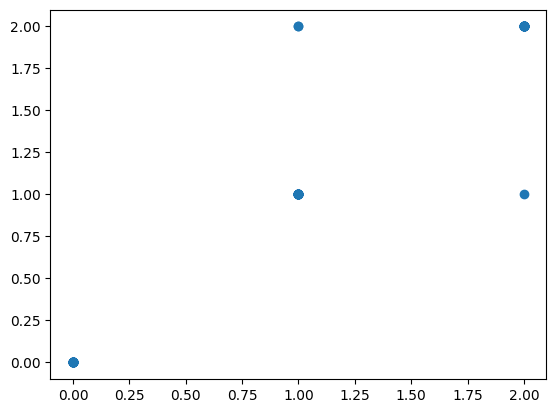

In [84]:
plt.scatter(output_test,y_pred_test)